In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt

In [3]:
def ruta_instancia(instancia):
    return 'instancias/%s.txt' % instancia

# Creo el archivo que con los puntos de la $instancia y los parámetros del algoritmo
def crear_instancia(instancia, algoritmo, profundidad, sigmaT, ft):
    file_name = 'instancias/corridas/%s_%s_%s_%s_%s.txt' % (instancia, algoritmo, profundidad, sigmaT, ft)
    output_file = open(file_name, 'w')
    output_file.write(algoritmo + '\n')
    output_file.write(str(profundidad) + '\n')
    output_file.write(str(sigmaT) + '\n')
    output_file.write(str(ft) + '\n')
    
    archivo_instancia = open(ruta_instancia(instancia), 'r')
    output_file.writelines(archivo_instancia.readlines())
    archivo_instancia.close()
    
    output_file.close()
    return file_name

In [4]:
# Creo un DataFrame con la instancia pedida
def cargar_informacion(nombre_instancia,file):
    matrix_data = []
    archivo_instancia = open(ruta_instancia(nombre_instancia), 'rb')
    size = int(archivo_instancia.readline())
    
    indice = 1
    lineas = archivo_instancia.readlines()
    for linea in lineas:
        lista = linea.split()
        x = int(lista[0])
        y = int(lista[1])
        matrix_data.append([indice,x,y, nombre_instancia])
        indice = indice + 1
    archivo_instancia.close()
    
    return pd.DataFrame(matrix_data, columns=['numero_punto','x', 'y','instancia'])

In [5]:
# Corro el $algoritmo (ejecutable) para el input del $archivo
def correr_instancia(archivo, algoritmo):
    archivo = open(archivo, 'rb')
    input_data = archivo.read()
    archivo.close()
    result = subprocess.run(["../../cmake-build-debug/%s" % algoritmo], stdout=subprocess.PIPE, input=input_data)
    clusters = result.stdout.decode("utf-8").split('\n')
    clusters.pop(len(clusters) -1)
    return lista_de(clusters,int)

def lista_de(lista,tipo):
    return list(map(lambda valor : tipo(valor),lista))

In [6]:
# Englobo todas las funciones y devuelvo un DataFrame con la instancia y los clusters calculados
def calcular_y_graficar(instancia, algoritmo, profundidad, sigmaT, ft):
    file_name = crear_instancia(instancia,algoritmo,profundidad,sigmaT,ft)
    data_frame = cargar_informacion(instancia, file_name)
    data_frame['clusters'] = correr_instancia(file_name, 'ejercicio-1-main')
    return data_frame

## Correr una instancia con parámetros

In [7]:
instancia = 'ejemplo-10'
file_name = crear_instancia(instancia,'kruskal-compressed',3,2,2)
data_frame = cargar_informacion(instancia, file_name)
data_frame

,numero_punto,x,y,instancia
0,1,1,3,ejemplo-10
1,2,2,3,ejemplo-10
2,3,1,1,ejemplo-10
3,4,2,1,ejemplo-10
4,5,2,2,ejemplo-10
5,6,8,3,ejemplo-10
6,7,9,3,ejemplo-10
7,8,8,4,ejemplo-10
8,9,8,5,ejemplo-10
9,10,9,5,ejemplo-10


In [8]:
data_frame['clusters'] = correr_instancia(file_name, 'ejercicio-1-main')
data_frame

,numero_punto,x,y,instancia,clusters
0,1,1,3,ejemplo-10,1
1,2,2,3,ejemplo-10,1
2,3,1,1,ejemplo-10,1
3,4,2,1,ejemplo-10,1
4,5,2,2,ejemplo-10,1
5,6,8,3,ejemplo-10,2
6,7,9,3,ejemplo-10,2
7,8,8,4,ejemplo-10,2
8,9,8,5,ejemplo-10,2
9,10,9,5,ejemplo-10,2


## Graficar la instancia anterior

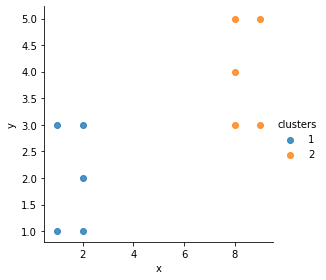

In [9]:
sns.lmplot(data=data_frame,x='x',y='y',hue='clusters',fit_reg=False, legend=True, legend_out=True,height=4)

# Graficar otra instancia

In [10]:
df = calcular_y_graficar('instancia-1' ,'kruskal-compressed',3,1.5,1.5)

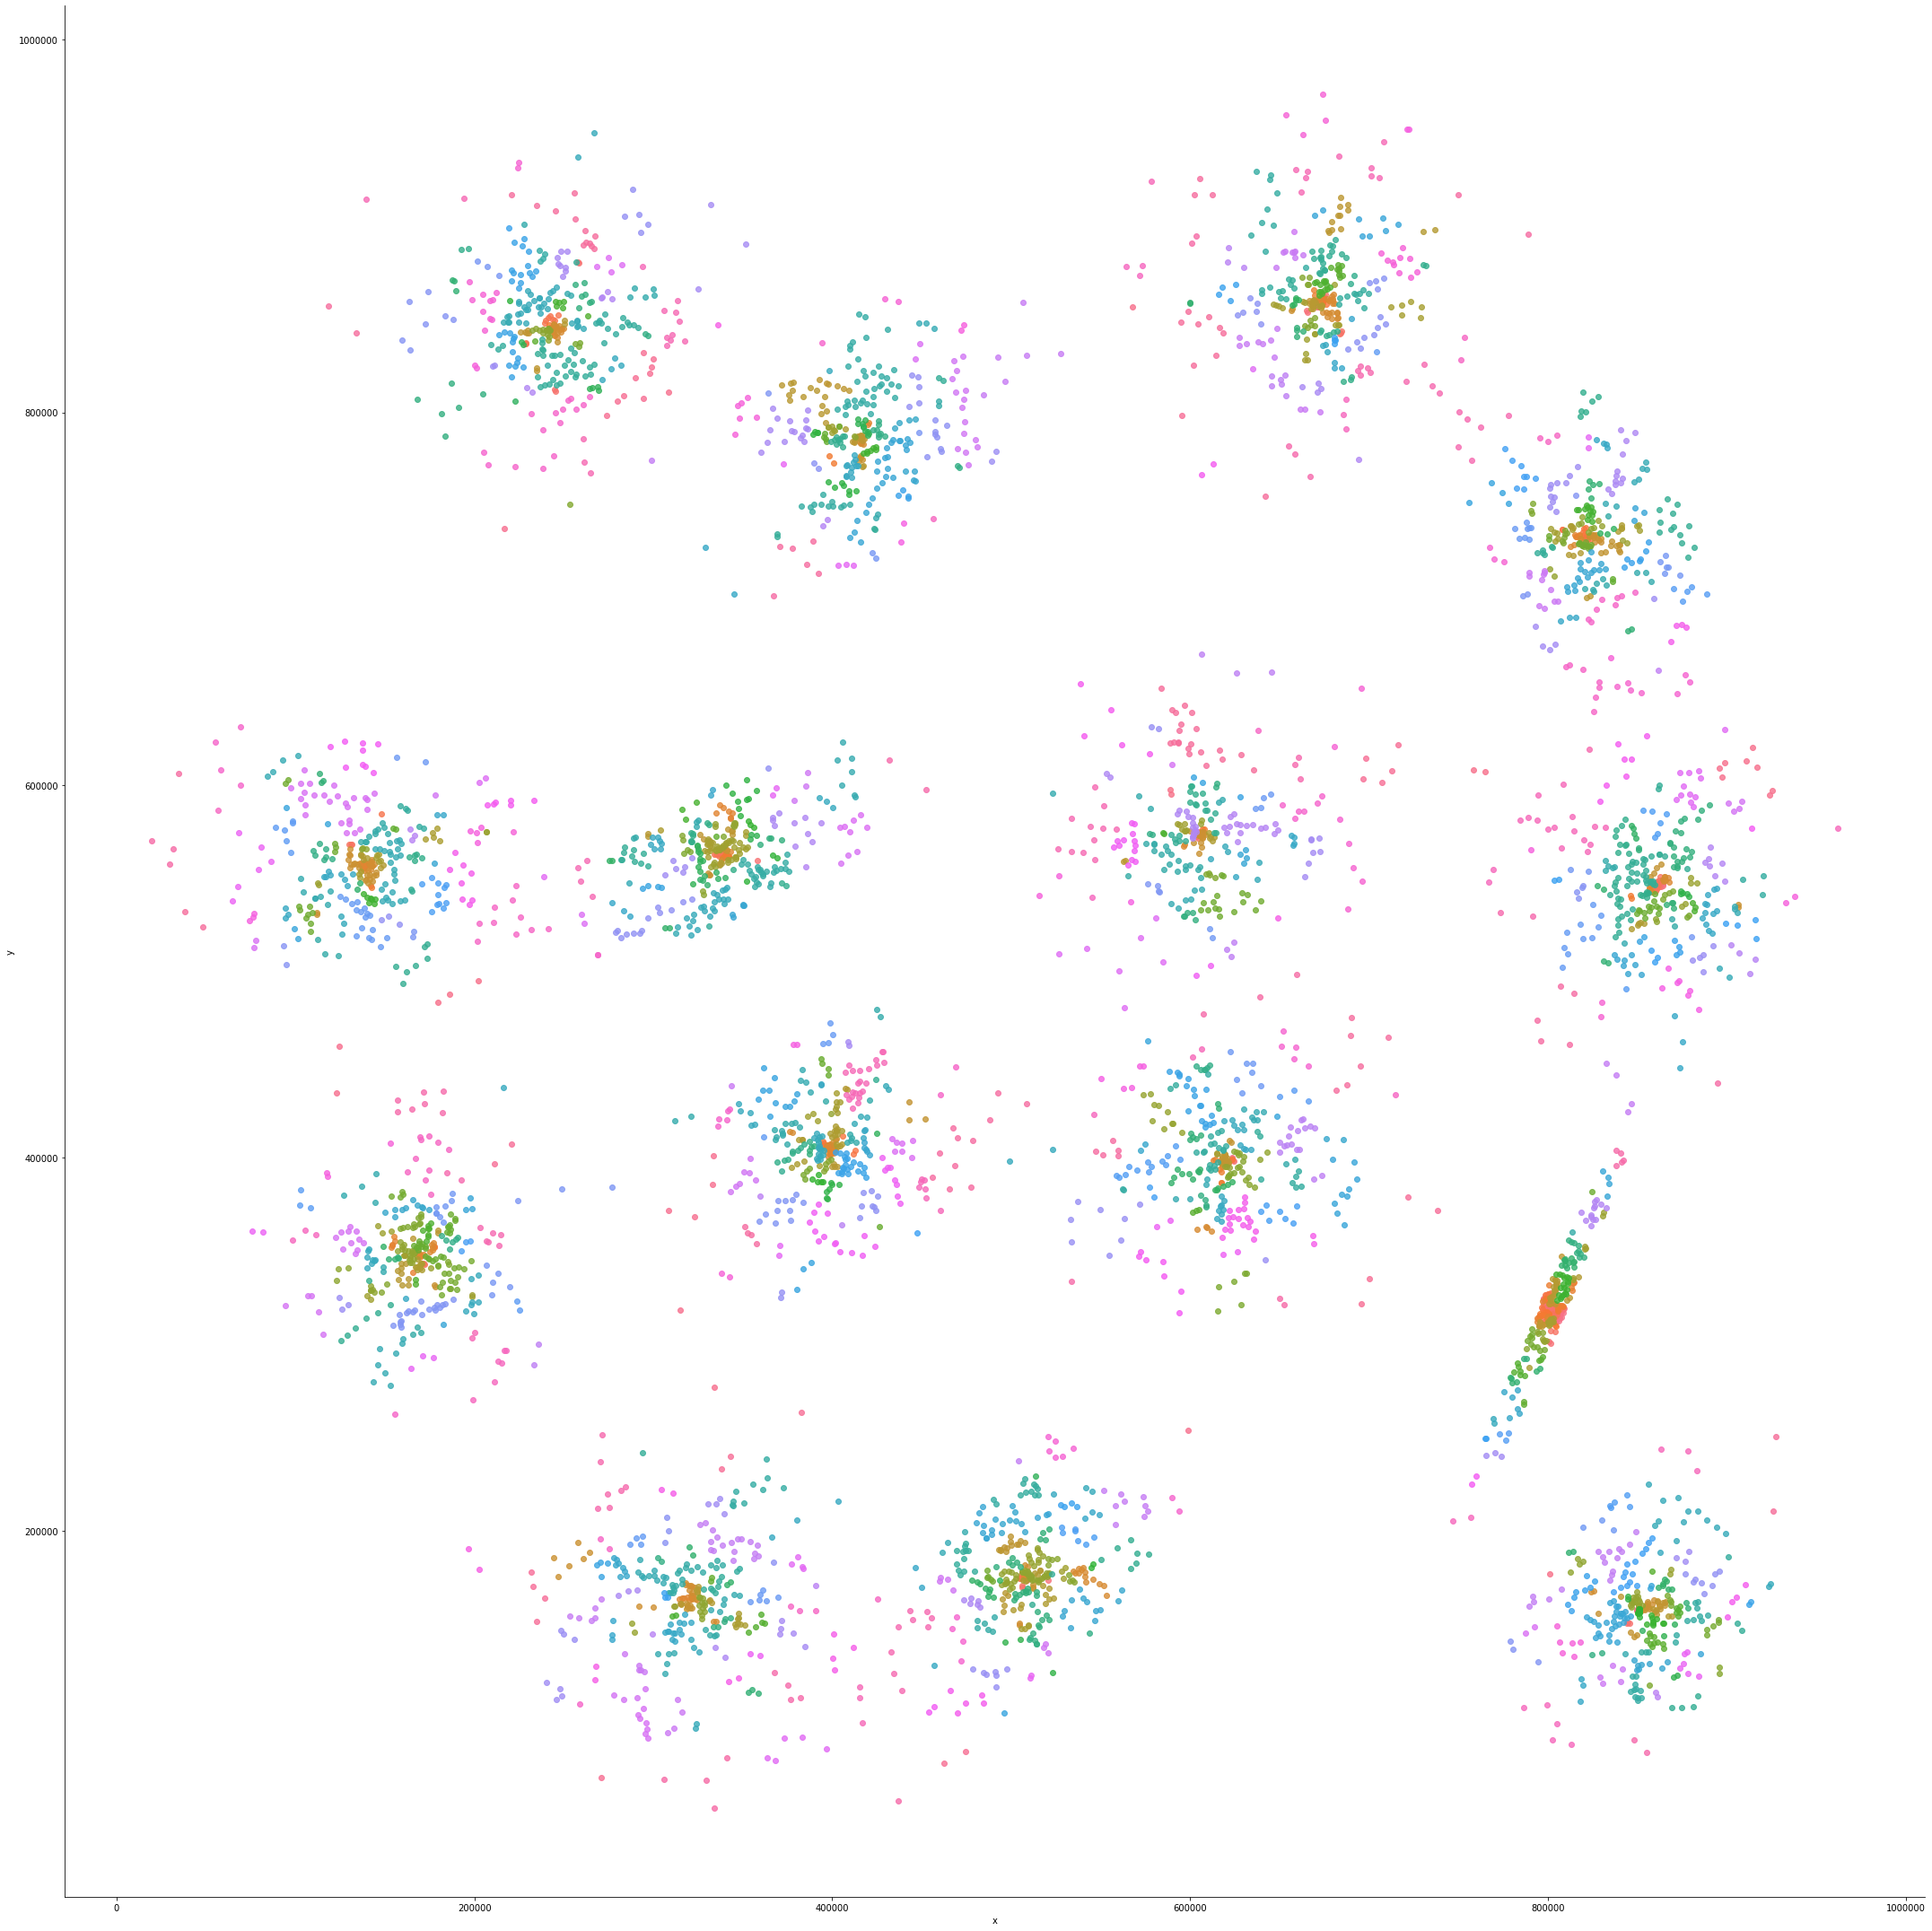

In [11]:
sns.lmplot(data=df ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30)

## Graficar con identificadores distintivos

In [12]:
def lista_sin_repetidos(clusters):
      return list(dict.fromkeys(lista_de(clusters,str)))
    
def plot_con_letra(data):
    #create a new figure
    plt.figure(figsize=(10,15))
    
    # customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']

    lista_clusters = lista_sin_repetidos(data['clusters'])
    customPalette = ['#630C3A']*len(lista_clusters)
    
    #loop through labels and plot each cluster
    for i, label in enumerate(lista_clusters):

        #loop through data points and plot each point 
        for l, row in data.loc[data['clusters']==label,:].iterrows():

            #add the data point as text
            plt.annotate(row['clusters'], 
                         (row['x'], row['y']),
                         horizontalalignment='center',
                         verticalalignment='center',
                         size=15,
                         color=customPalette[i])
    plt.show()

In [13]:
#plot_con_letra(data_frame)

# Experimentación

In [14]:
df1 = calcular_y_graficar('instancia-1' ,'kruskal-compressed',2,2,1.5)

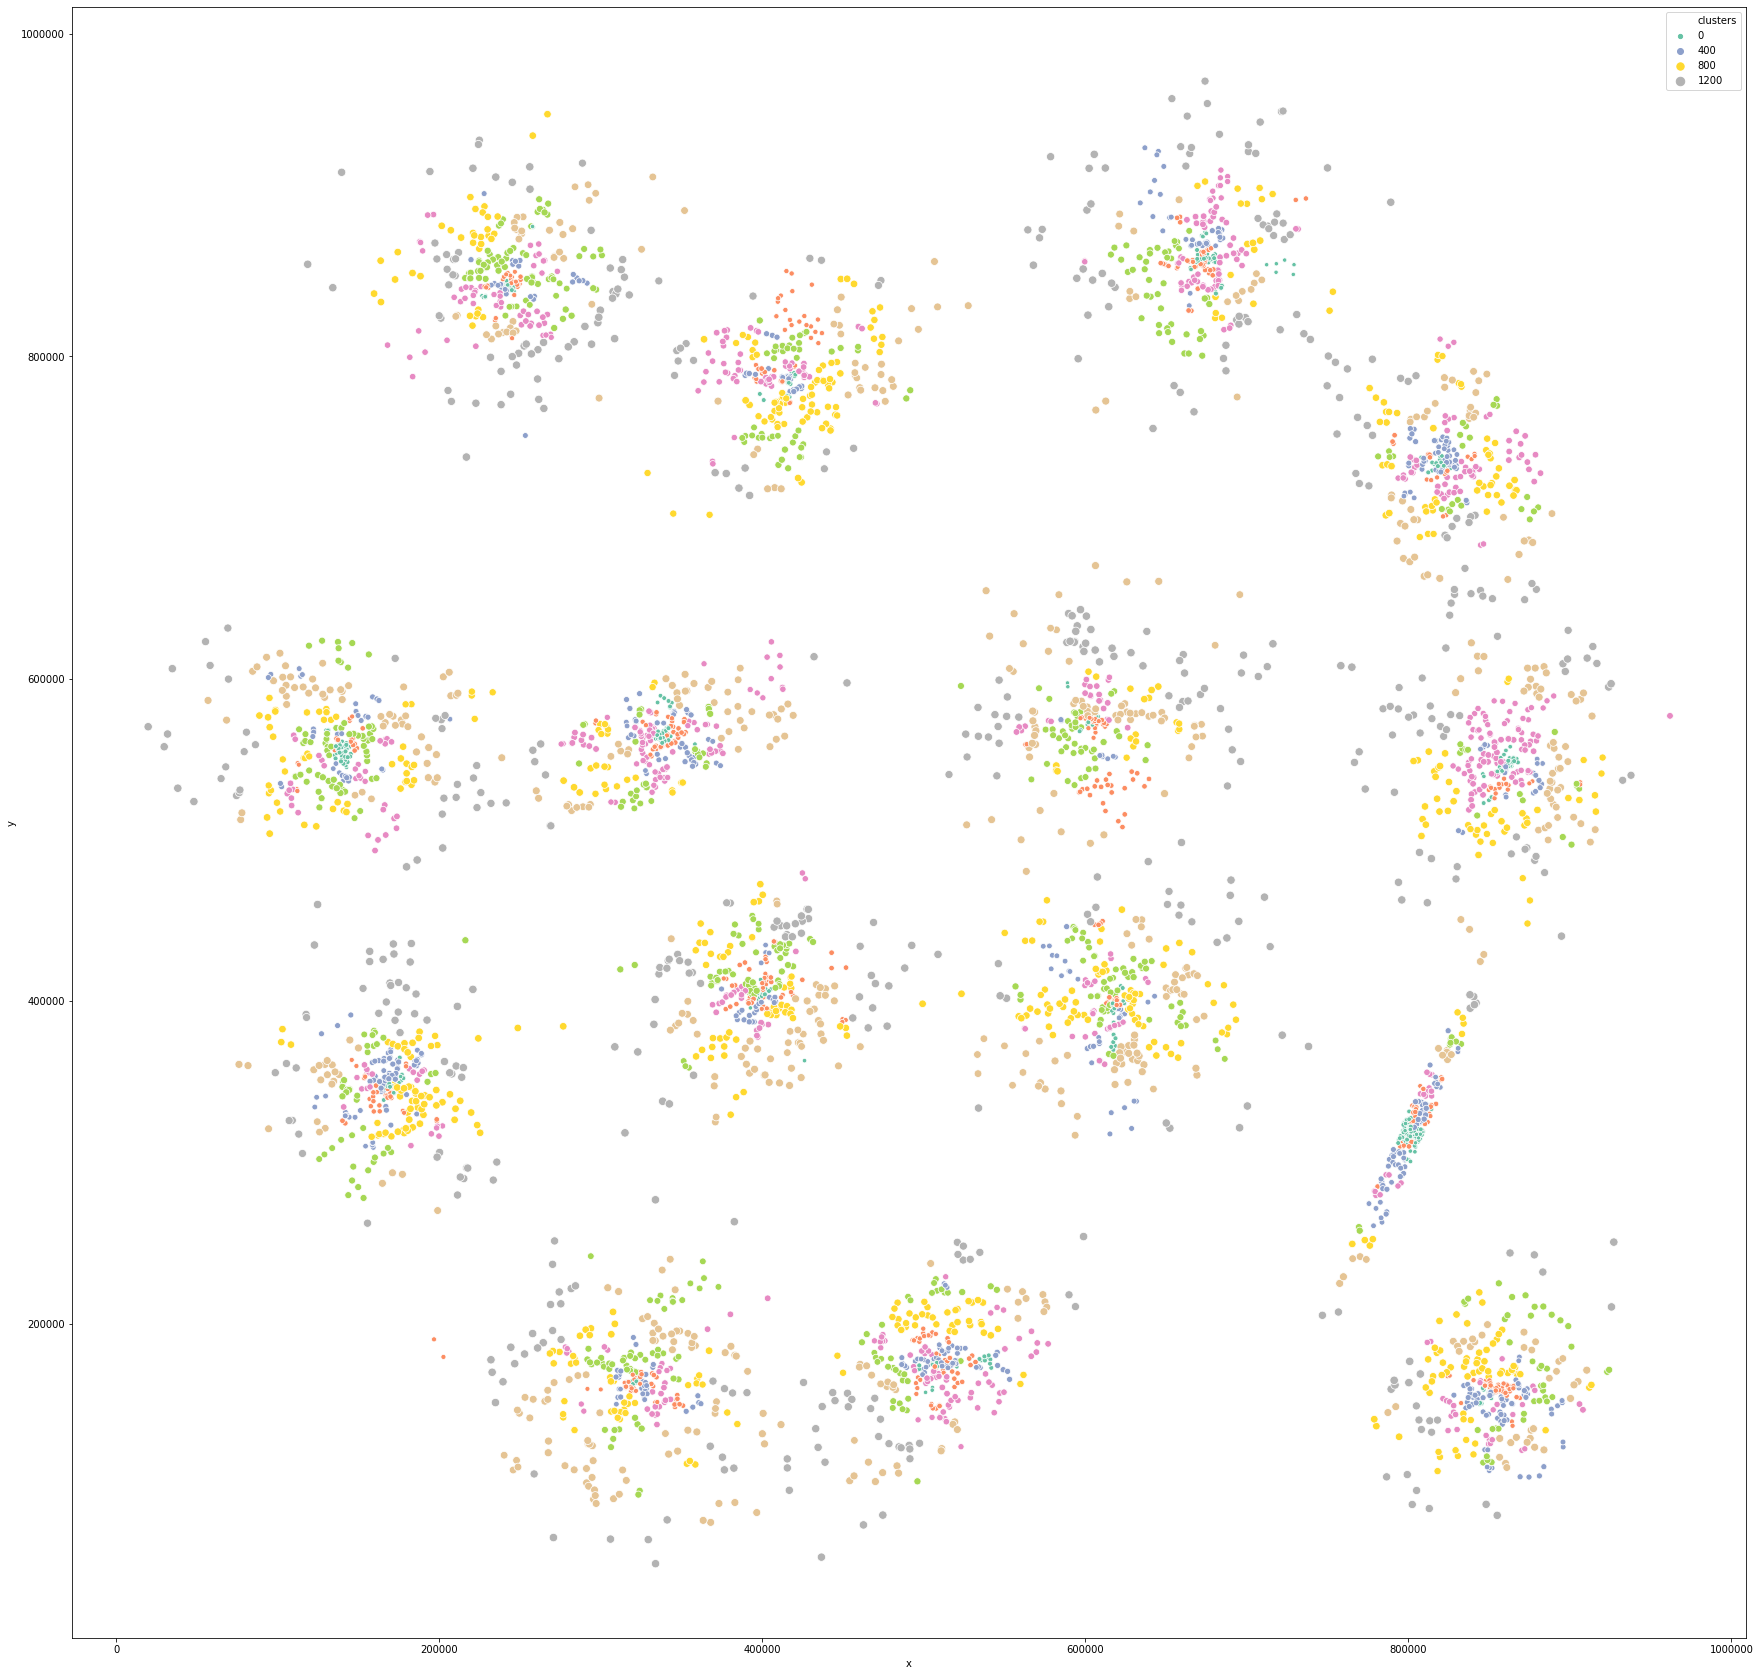

In [15]:
plt.figure(figsize=(30, 30))
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='x',y='y',hue='clusters', size='clusters' ,data=df1, palette='Set2')

Parametros recomendados por el paper. Los encontramos insatisfactorios para el experimento porque hay una gran disparidad en los clusters.

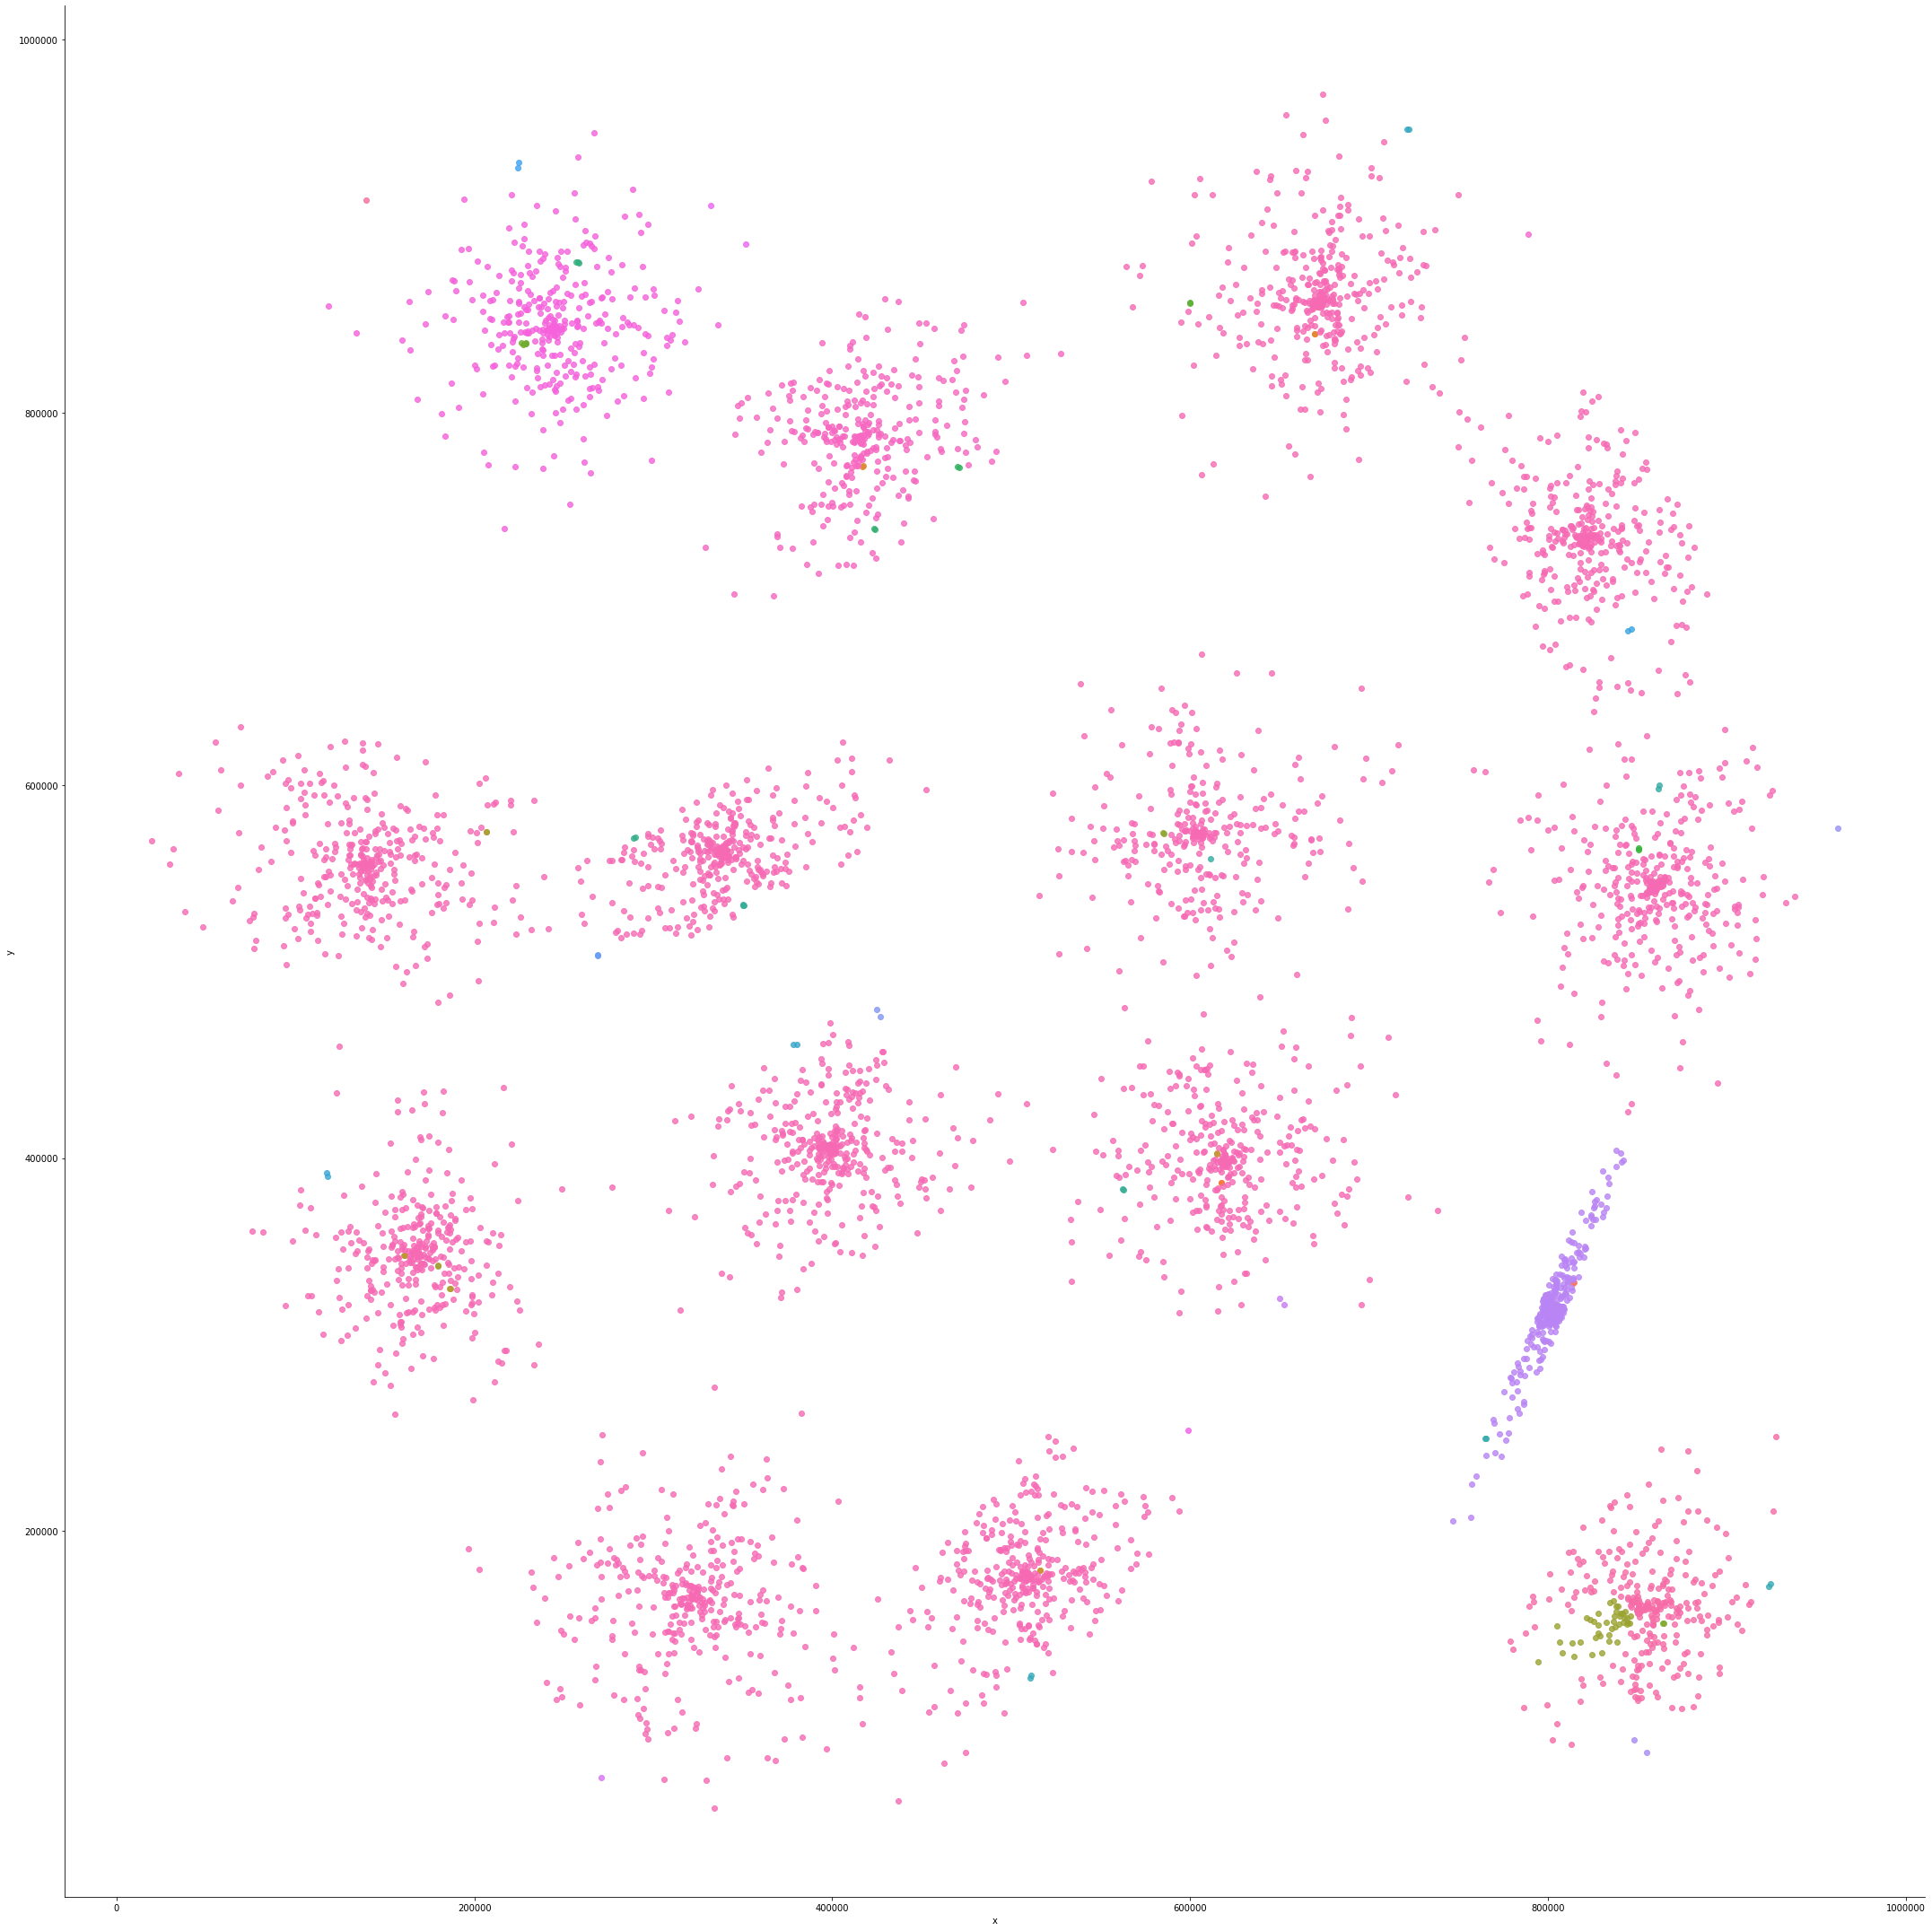

In [16]:
df2 = calcular_y_graficar('instancia-1' ,'kruskal-compressed',10,5,5)
sns.lmplot(data=df2 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30)

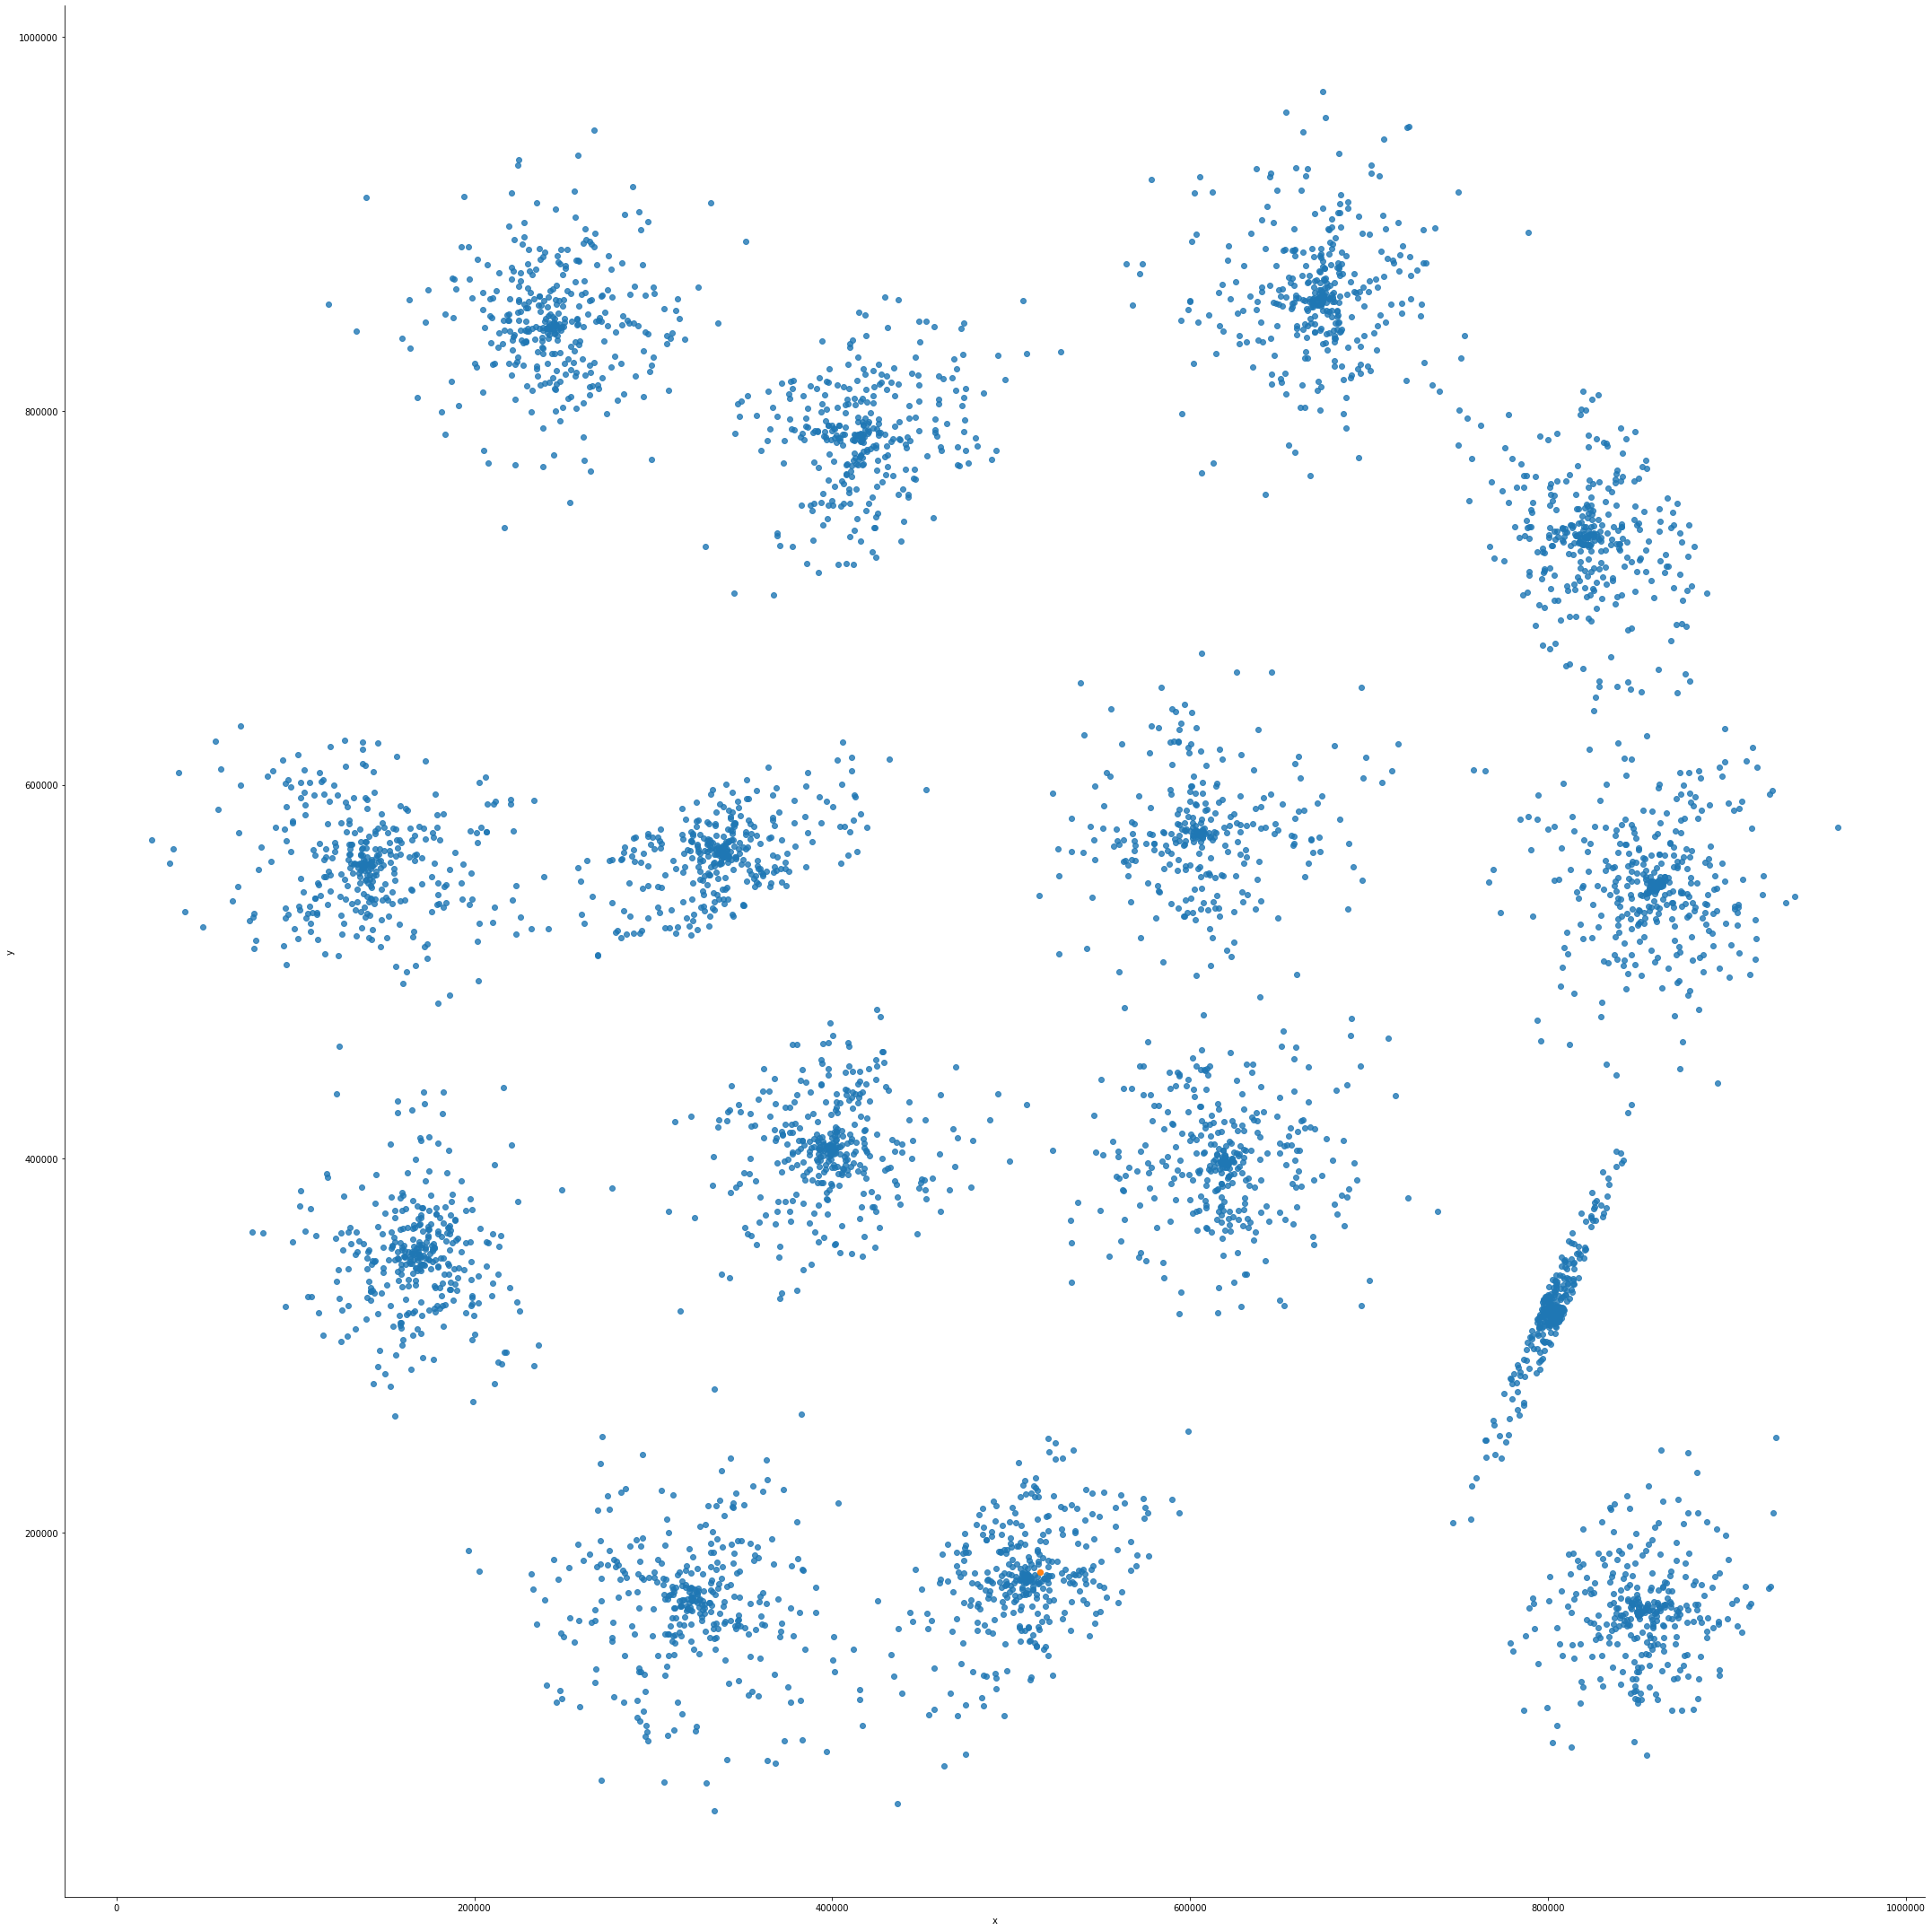

In [17]:
df3 = calcular_y_graficar('instancia-1' ,'kruskal-compressed',3,50,50)
sns.lmplot(data=df3 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30)

Con parámetros muy grandes la restricción casi nunca se cumple entonces no separamos en clusters.

In [19]:
df3 = calcular_y_graficar('linea-2' ,'kruskal-compressed',3,20,20)

In [ ]:
sns.lmplot(data=df3 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30)

In [ ]:
puntos = np.random.multivariate_normal(np.array([1,1]),np.eye(2),100)
puntos1 = np.random.multivariate_normal(np.array([10,10]),np.eye(2),100)

sns.scatterplot(x=puntos[:, 0], y=puntos[:, 1])
sns.scatterplot(x=puntos1[:, 0], y=puntos1[:, 1])

In [ ]:
dataclase = pd.DataFrame(puntos, columns=['x', 'y'])